<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/Lockdown%201/GEO(SI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyparsing.helpers import PrecededBy
url='https://raw.githubusercontent.com/costpetrides/Air-pollution-COVID-19-impact/refs/heads/main/Lockdown%201/DATA/GEO_DATA.csv'
df = pd.read_csv(url)
print(df)

       DAY  COMEAN  COMIN  COMAX  CO2O  NOMEAN  NOMIN  NOMAX  NO2O  NO2MEAN  \
0    1-Mar    0.64   0.27   1.53   0.7   23.19   2.08  67.65   9.0    31.27   
1    2-Mar    0.43   0.23   0.84   0.8    7.97   1.63  22.54  22.0    32.47   
2    3-Mar    0.46   0.26   0.60   0.7   11.87   1.96  27.00  23.0    36.43   
3    4-Mar    0.58   0.40   0.81   0.4   15.63   4.21  26.17   2.0    36.35   
4    5-Mar    0.75   0.43   1.13   0.8   24.77   5.25  40.71  16.0    30.72   
..     ...     ...    ...    ...   ...     ...    ...    ...   ...      ...   
87  27-May    0.34   0.25   0.48   0.4    9.70   3.63  24.42   1.0    34.52   
88  28-May    0.33   0.23   0.44   0.8    7.15   3.13  15.50   8.0    26.98   
89  29-May    0.28   0.24   0.39   0.7    3.69   1.96   5.00  17.0    26.62   
90  30-May    0.32   0.20   0.43   0.6    9.43   2.50  14.21  10.0    19.99   
91  31-May    0.37   0.30   0.48   0.6   11.75   6.75  17.08  15.0    17.53   

    NO2MIN  NO2MAX  NO22O  O3MEAN  O3MIN  O3MAX  O3

## **NO**

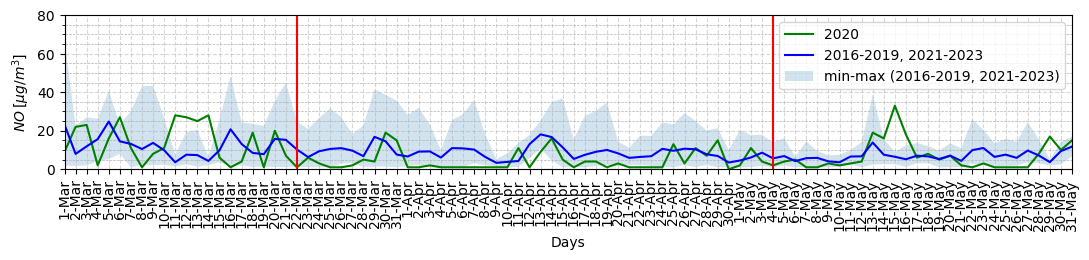

In [ ]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$NO \: [μg/m^{3}$]')

plt.plot(df['DAY'], df['NO2O'], 'g', label='2020')
plt.plot(df['DAY'], df['NOMEAN'], 'b', label='2016-2019, 2021-2023')
plt.fill_between(df['DAY'], df['NOMIN'], df['NOMAX'], alpha=0.2 ,label='min-max (2016-2019, 2021-2023)')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,80)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(5))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

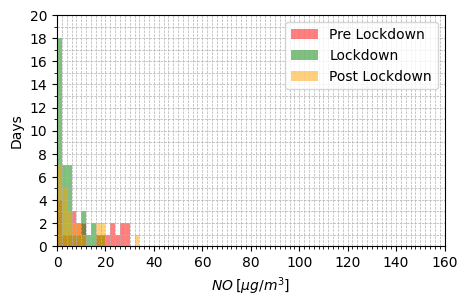

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(5,3))
bins = np.arange(0, 42, 2)

# Plotting histograms
plt.hist(df['NO2O'][0:23][df['NO2O'][0:23]>0], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['NO2O'][23:66][df['NO2O'][23:66]>0], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['NO2O'][66:91][df['NO2O'][66:91]>0], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')


plt.xlabel('$NO \: [μg/m^{3}$]')
plt.ylabel('Days')
plt.legend()
plt.xlim(0,160)
plt.ylim(0,20)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 180, 20))
plt.yticks(np.arange(0, 22, 2))
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.grid(linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
mean_NOMEAN = df['NOMEAN'][23:66].dropna().mean()
mean_NO20 = df['NO2O'][23:66].dropna().mean()

if pd.notna(mean_NOMEAN) and pd.notna(mean_NO20):
    percentage_change = ((mean_NO20 - mean_NOMEAN) / mean_NOMEAN) * 100

# Print the results
print(f"Mean (23-66): {mean_NOMEAN:.2f}")
print(f"Mean of 2020 (23-66): {mean_NO20:.2f}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")

Mean (23-66): 8.75
Mean of 2020 (23-66): 4.47
Percentage Change: -49.00%


In [ ]:
PRE  = df['NO2O'][0:23].dropna().mean()
LOCK = df['NO2O'][23:66].dropna().mean()
POST = df['NO2O'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE:.2f}")
print(f"LOCK: {LOCK:.2f}")
print(f"POST: {POST:.2f}")

PRE: 13.17
LOCK: 4.47
POST: 7.04


In [ ]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: -66.11%
LOCK to POST: 57.67%


## **$NO_{2}$**

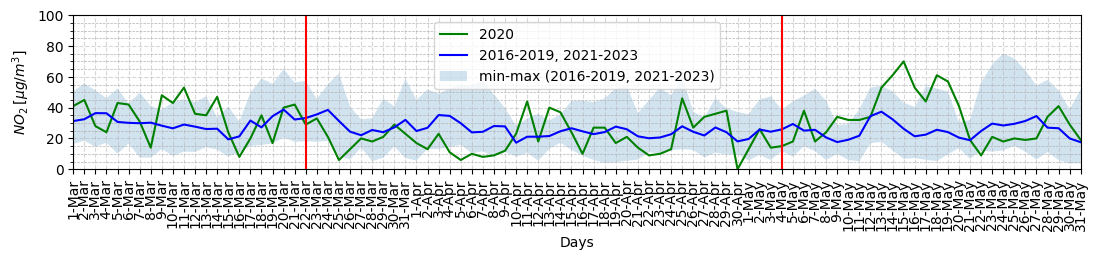

In [ ]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$NO_{2} \: [μg/m^{3}$]')

plt.plot(df['DAY'], df['NO22O'], 'g', label='2020')
plt.plot(df['DAY'], df['NO2MEAN'], 'b', label='2016-2019, 2021-2023')
plt.fill_between(df['DAY'], df['NO2MIN'], df['NO2MAX'], alpha=0.2, label='min-max (2016-2019, 2021-2023)')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,100)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(5))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

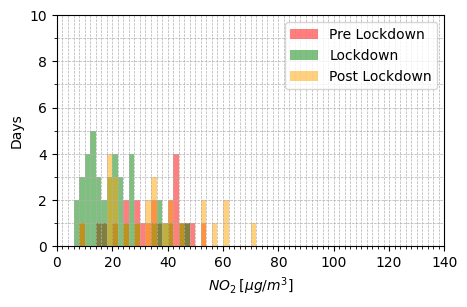

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))
bins = np.arange(0, 82, 2)

plt.hist(df['NO22O'][0:23][df['NO22O'][0:23]>0], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['NO22O'][23:66][df['NO22O'][23:66]>0], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['NO22O'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$NO_{2} \: [μg/m^{3}$]')
plt.ylabel('Days')
plt.legend()
plt.xlim(0,140)
plt.ylim(0,10)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 160, 20))
plt.yticks(np.arange(0, 12, 2))
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
mean_NO2MEAN = df['NO2MEAN'][23:66].dropna().mean()
mean_NO220 = df['NO22O'][23:66].dropna().mean()

if pd.notna(mean_NO2MEAN) and pd.notna(mean_NO220):
    percentage_change = ((mean_NO220 - mean_NO2MEAN) / mean_NO2MEAN) * 100

# Print the results
print(f"Mean (23-66): {mean_NO2MEAN:.2f}")
print(f"Mean of 2020 (23-66): {mean_NO220:.2f}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")

Mean (23-66): 25.375348837209305
Mean of 2020 (23-66): 20.023255813953487
Percentage Change: -21.09%


In [ ]:
PRE  = df['NO22O'][0:23].dropna().mean()
LOCK = df['NO22O'][23:66].dropna().mean()
POST = df['NO22O'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE:.2f}")
print(f"LOCK: {LOCK:.2f}")
print(f"POST: {POST:.2f}")

PRE: 33.83
LOCK: 20.02
POST: 35.28


In [ ]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: -40.81%
LOCK to POST: 76.20%


## $O_{3}$

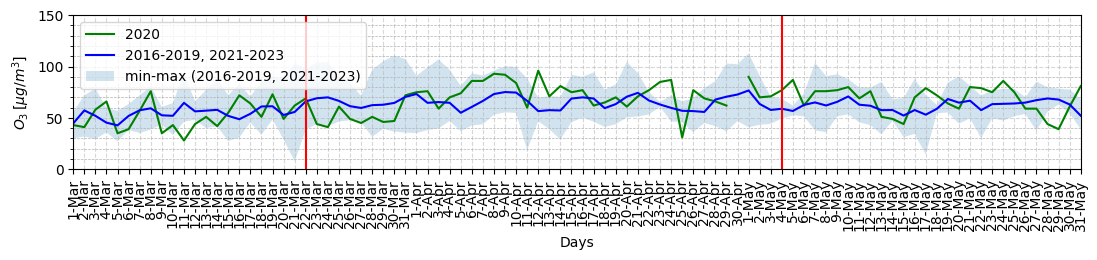

In [ ]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$O_{3} \:  [μg/m^{3}$]')

x=[]
for i in df['O32O']:
  if i==0:
    x+=[None]
  else:
    x+=[i]

plt.plot(df['DAY'], x, 'g', label='2020')
plt.plot(df['DAY'], df['O3MEAN'], 'b', label='2016-2019, 2021-2023')
plt.fill_between(df['DAY'], df['O3MIN'], df['O3MAX'], alpha=0.2,label='min-max (2016-2019, 2021-2023)')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,150)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

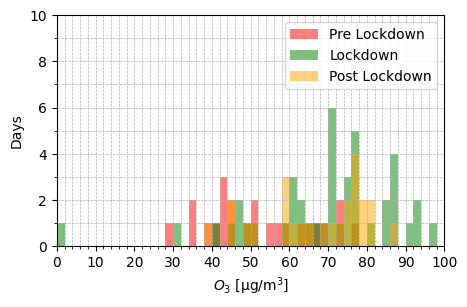

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))
bins = np.arange(0, 102, 2)

plt.hist(df['O32O'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['O32O'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['O32O'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$O_{3}$ [μg/m$^{3}$]')
plt.ylabel('Days')
plt.legend()
plt.xlim(0,100)
plt.ylim(0,10)


plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 12, 2))
plt.grid(linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
mean_O3MEAN = df['O3MEAN'][23:66].dropna().mean()
mean_O320 = df['O32O'][23:66].dropna().mean()

if pd.notna(mean_O3MEAN) and pd.notna(mean_O320):
    percentage_change = ((mean_O320 - mean_O3MEAN) / mean_O3MEAN) * 100

# Print the results
print(f"Mean (23-66): {mean_O3MEAN:.2f}")
print(f"Mean of 2020 (23-66): {mean_O320:.2f}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")


Mean (23-66): 64.85
Mean of 2020 (23-66): 68.49
Percentage Change: 5.61%


In [ ]:
PRE  = df['O32O'][0:23].dropna().mean()
LOCK = df['O32O'][23:66].dropna().mean()
POST = df['O32O'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE:.2f}")
print(f"LOCK: {LOCK:.2f}")
print(f"POST: {POST:.2f}")

PRE: 52.04
LOCK: 68.49
POST: 66.44


In [ ]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: 31.60%
LOCK to POST: -2.99%


# **CO**

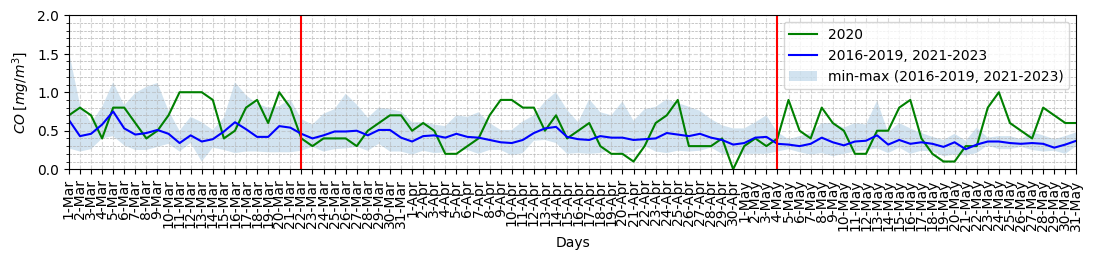

In [ ]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$CO \: [mg/m^{3}$]')

plt.plot(df['DAY'], df['CO2O'], 'g', label='2020')
plt.plot(df['DAY'], df['COMEAN'], 'b', label='2016-2019, 2021-2023')
plt.fill_between(df['DAY'], df['COMIN'], df['COMAX'], alpha=0.2 ,label='min-max (2016-2019, 2021-2023)')
plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,2)

plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.grid(linestyle='--', alpha=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

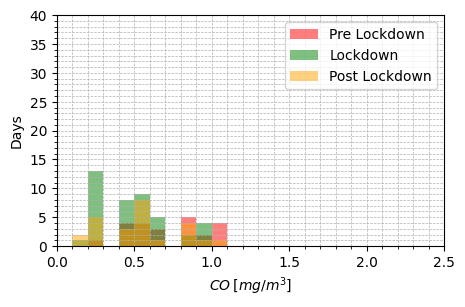

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))
bins = np.arange(0, 2.1, 0.1)

plt.hist(df['CO2O'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['CO2O'][23:66][df['CO2O'][23:66]>0], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['CO2O'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$CO \: [mg/m^{3}$]')
plt.ylabel('Days')
plt.legend()
plt.xlim(0,2.5)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 3.0, 0.5))
plt.yticks(np.arange(0, 45, 5))
plt.grid(linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
mean_COMEAN = df['COMEAN'][23:66].dropna().mean()
mean_CO20 = df['CO2O'][23:66].dropna().mean()

if pd.notna(mean_COMEAN) and pd.notna(mean_CO20):
    percentage_change = ((mean_CO20 - mean_COMEAN) / mean_COMEAN) * 100

# Print the results
print(f"Mean (23-66): {mean_COMEAN:.2f}")
print(f"Mean of 2020 (23-66): {mean_CO20:.2f}")
print(f"Percentage Change: {percentage_change:.2f}%" if pd.notna(percentage_change) else "Percentage Change: Not computable")

Mean (23-66): 0.42
Mean of 2020 (23-66): 0.47
Percentage Change: 12.89%


In [ ]:
PRE  = df['CO2O'][0:23].dropna().mean()
LOCK = df['CO2O'][23:66].dropna().mean()
POST = df['CO2O'][66:91].dropna().mean()

# Print the results
print(f"PRE: {PRE:.2f}")
print(f"LOCK: {LOCK:.2f}")
print(f"POST: {POST:.2f}")

PRE: 0.70
LOCK: 0.47
POST: 0.51


In [ ]:
# Calculate percentage difference from PRE to LOCK
percentage_diff_pre_lock = ((LOCK - PRE) / PRE) * 100

# LOCK to POST
percentage_diff_lock_post = ((POST - LOCK) / LOCK) * 100

print(f"PRE to LOCK: {percentage_diff_pre_lock:.2f}%")
print(f"LOCK to POST: {percentage_diff_lock_post:.2f}%")

PRE to LOCK: -31.80%
LOCK to POST: 7.08%
